<a href="https://colab.research.google.com/github/Sakuni99/ML-Lab-01/blob/main/ML_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data files

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data = pd.read_csv("train.csv")
valid_data = pd.read_csv("valid.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
X_train = train_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
y_train = train_data["label_1"]

In [ ]:
X_valid = valid_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
y_valid = valid_data["label_1"]

In [ ]:
X_test = valid_data.drop(columns=["label_1", "label_2", "label_3", "label_4"])
y_test = valid_data["label_1"]

In [ ]:
x_train = {}
x_valid = {}
y_train = {}
y_valid = {}
x_test = {}
y_test = {}
Labels = ["label_1", "label_2", "label_3", "label_4"]
Features = np.array(train_data.drop(columns=["label_1", "label_2", "label_3", "label_4"]).columns)

In [ ]:
for label in Labels :
  tr_data = train_data[train_data["label_2"].notna()] if label == "label_2" else train_data
  vl_data = valid_data[train_data["label_2"].notna()] if label == "label_2" else train_data
  scaler = StandardScaler()
  x_train[label] = pd.DataFrame(scaler.fit_transform(tr_data.drop(Labels,axis=1)), columns = Features)
  y_train[label] = tr_data[label]
  x_valid[label] = pd.DataFrame(scaler.transform(vl_data.drop(Labels,axis=1)), columns = Features)
  y_valid[label] = vl_data[label]
  x_test[label] = pd.DataFrame(scaler.transform(test_data.drop(Labels,axis=1)), columns = Features)
  y_test[label] = test_data[label]

<ipython-input-14-56e0bd80cc49>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vl_data = valid_data[train_data["label_2"].notna()] if label == "label_2" else train_data


In [ ]:
# Get the correlation matrix.
# correlation_matrix = np.corrcoef(x_train_label1_PCA.values)
def getCorrelatedFeatures(pca_dataset):
  corr_matrix = pca_dataset.corr()
  less_correlate_col = []
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) < 0.5:
        less_correlate_col.append(corr_matrix.columns[i])
  return less_correlate_col

In [ ]:
def write_csv(feature_df, label):
  for i in range (feature_df['No of new features'][0], 256):
    feature_df[f'new_feature_{i+1}'] = pd.NA
  filename = f'190086B_label_{label}.csv'
  feature_df.to_csv(filename, index=False)

# Models

In [ ]:
################################################# develop models #################################################
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Create a SVM classifier model.
svm_model = SVC(kernel="linear", class_weight="balanced")

# Label 1

## KNN

In [ ]:
############################################ label 1 KNN #########################################################
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train["label_1"], y_train["label_1"])

KNeighborsClassifier()

In [ ]:
y_pred_label_1 = knn_model.predict(x_valid["label_1"])

In [ ]:
accuracy_label_1 = accuracy_score(y_valid["label_1"], y_pred_label_1)
print("Accuracy_label_1:", accuracy_label_1)

Accuracy_label_1: 0.9918302945301543


In [ ]:
# Predict the model on testing data before feature extraction
y_pred_label_1_test = knn_model.predict(x_test["label_1"])

### Filter Method

In [ ]:
selector_KNN_Label_1 = SelectKBest(f_classif, k = 93)
x_new_KNN_Label1 = selector_KNN_Label_1.fit_transform(x_train["label_1"],y_train["label_1"])
print("shape: ", x_new_KNN_Label1.shape)

shape:  (28520, 93)


In [ ]:
# Train the model on the training data.
knn_model.fit(x_new_KNN_Label1, y_train["label_1"])

KNeighborsClassifier()

In [ ]:
# Predict the labels for the validation data.
y_pred_label_1_kbest_KNN = knn_model.predict(selector_KNN_Label_1.transform(x_valid["label_1"]))

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_1_KNN_Kbest = accuracy_score(y_valid["label_1"], y_pred_label_1_kbest_KNN)
print("Accuracy_label 1 after applying Kbest and reduce number of features to 100:", accuracy_label_1_KNN_Kbest)

Accuracy_label 1 after applying Kbest and reduce number of features to 100: 0.9878681626928472


### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components= 0.88, svd_solver="full")
pca.fit(x_train["label_1"])
x_train_label1_PCA = pd.DataFrame(pca.transform(x_train["label_1"]))
x_valid_label1_PCA = pd.DataFrame(pca.transform(x_valid["label_1"]))
print("Shape after PCA : ", x_train_label1_PCA.shape)

Shape after PCA :  (28520, 44)


In [ ]:
# Train the model on the training data.
knn_model_PCA_LAbel_1 = KNeighborsClassifier(n_neighbors=5)
knn_model_PCA_LAbel_1.fit(x_train_label1_PCA, y_train["label_1"])

KNeighborsClassifier()

<Axes: >

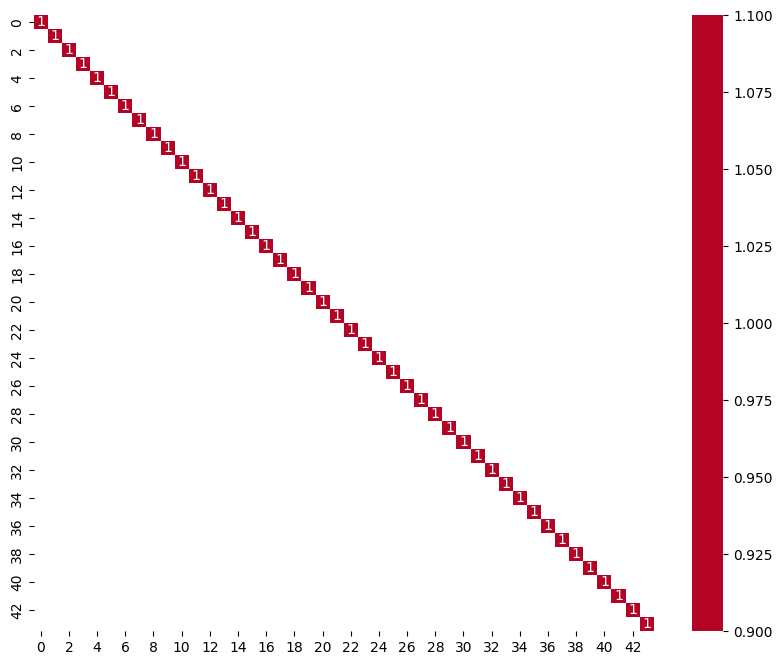

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = x_train_label1_PCA.corr()
corr_threshld = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshld) | (corr_matrix < -corr_threshld)]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr_matrix, annot = True, cmap = 'coolwarm', center = 0 )

In [ ]:
# Predict the labels for the validation data.
y_pred_label_1_PCA_KNN = knn_model_PCA_LAbel_1.predict(pca.transform(x_valid["label_1"]))

In [ ]:
accuracy_label_1_KNN_PCA = accuracy_score(y_valid["label_1"], y_pred_label_1_PCA_KNN)
print("Accuracy_label_1 after applying PCA for KNN:", accuracy_label_1_KNN_PCA)

Accuracy_label_1 after applying PCA for KNN: 0.9873772791023843


In [ ]:
x_test_label1_PCA = pd.DataFrame(pca.transform(x_test["label_1"]))
x_test_pca_l1 =pca.transform(x_test["label_1"])
# Predict the labels for the testing data.
y_pred_label_1_PCA_KNN_testing = knn_model_PCA_LAbel_1.predict(pca.transform(x_test["label_1"]))

In [ ]:
label1_features = pd.DataFrame(data=x_test_pca_l1, columns=[f'new_feature_{i+1}' for i in range(x_test_pca_l1.shape[1])])
label1_features.insert(0,'Predicted labels before feature engineering',y_pred_label_1_test)
label1_features.insert(1,'Predicted labels after feature engineering', y_pred_label_1_PCA_KNN_testing)
label1_features.insert(2,'No of new features', x_test_label1_PCA.shape[1])

In [ ]:
write_csv(label1_features, 1)

## SVM

In [ ]:
########################################### label 1 SVM ##########################################


In [ ]:
# Train the model on the training data.
svm_model.fit(x_train["label_1"], y_train["label_1"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_1 = svm_model.predict(x_valid["label_1"])

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_1_SVM = accuracy_score(y_valid["label_1"], y_pred_label_1)
print("Accuracy_label 1:", accuracy_label_1_SVM)

Accuracy_label 1: 1.0


### Filter method

In [ ]:
################### Apply SelectBest to label 1 ########################
selector = SelectKBest(f_classif, k = 100)
x_new = selector.fit_transform(x_train["label_1"],y_train["label_1"])
print("shape: ", x_new.shape)

shape:  (28520, 100)


In [ ]:
# Train the model on the training data.
svm_model.fit(x_new, y_train["label_1"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_1_kbest = svm_model.predict(selector.transform(x_valid["label_1"]))

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_1_SVM_Kbest = accuracy_score(y_valid["label_1"], y_pred_label_1_kbest)
print("Accuracy_label 1 after applying Kbest and reduce number of features to 100:", accuracy_label_1_SVM_Kbest)

Accuracy_label 1 after applying Kbest and reduce number of features to 100: 1.0


### PCA

In [ ]:
pca_SVM = PCA(n_components= 0.95, svd_solver="full")
pca_SVM.fit(x_train["label_1"])
x_train_label1_PCA_SVM = pd.DataFrame(pca_SVM.transform(x_train["label_1"]))
x_valid_label1_PCA_SVM = pd.DataFrame(pca_SVM.transform(x_valid["label_1"]))
print("Shape after PCA : ", x_train_label1_PCA_SVM.shape)

Shape after PCA :  (28520, 67)


In [ ]:
# Train the model on the training data.
svm_model.fit(x_train_label1_PCA_SVM, y_train["label_1"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_1_PCA_SVM = svm_model.predict(x_valid_label1_PCA_SVM)

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_1_SVM = accuracy_score(y_valid["label_1"], y_pred_label_1_PCA_SVM)
print("Accuracy_label 1:", accuracy_label_1_SVM)

Accuracy_label 1: 1.0


# Label 2

## XGB Regressor

In [ ]:
import xgboost as xgb

In [ ]:
# Create an XGBRegressor object.
xg_reg = xgb.XGBRegressor()

In [ ]:
# Fit the XGBRegressor object to the training data.
xg_reg.fit(x_train["label_2"], y_train["label_2"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict the labels for the valid data.
y_pred_label_2 = xg_reg.predict(x_valid["label_2"])

In [ ]:
# Predict the model on testing data before feature extraction
y_pred_label_2_test = xg_reg.predict(x_test["label_2"])

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
testScore = math.sqrt(mean_squared_error(y_valid['label_2'], y_pred_label_2))
print("Error:", testScore)

Error: 2.4779493995689457


### PCA

In [ ]:
xg_reg_PCA = xgb.XGBRegressor()

In [ ]:
pca_label_2_XGB = PCA(n_components= 0.95, svd_solver="full")
pca_label_2_XGB.fit(x_train["label_2"])
x_train_label2_PCA = pd.DataFrame(pca_label_2_XGB.transform(x_train["label_2"]))
x_valid_label2_PCA = pd.DataFrame(pca_label_2_XGB.transform(x_valid["label_2"]))
x_test_label2_PCA = pd.DataFrame(pca_label_2_XGB.transform(x_test["label_2"]))
print("Shape after PCA : ", x_train_label2_PCA.shape)

Shape after PCA :  (28040, 67)


In [ ]:
# Fit the XGBRegressor object to the training data.
xg_reg_PCA.fit(x_train_label2_PCA, y_train["label_2"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict the labels for the validation data.
y_pred_label_4_PCA_XGB = xg_reg_PCA.predict(pca_label_2_XGB.transform(x_valid["label_2"]))

In [ ]:
# Predict the labels for the testing data.
y_pred_label_4_PCA_XGB_testing = xg_reg_PCA.predict(pca_label_2_XGB.transform(x_test["label_2"]))

In [ ]:
testScore_PCA = math.sqrt(mean_squared_error(y_valid['label_2'], y_pred_label_4_PCA_XGB))
print("Error after applying PCA:", testScore_PCA)

Error after applying PCA: 2.893676148967224


<Axes: >

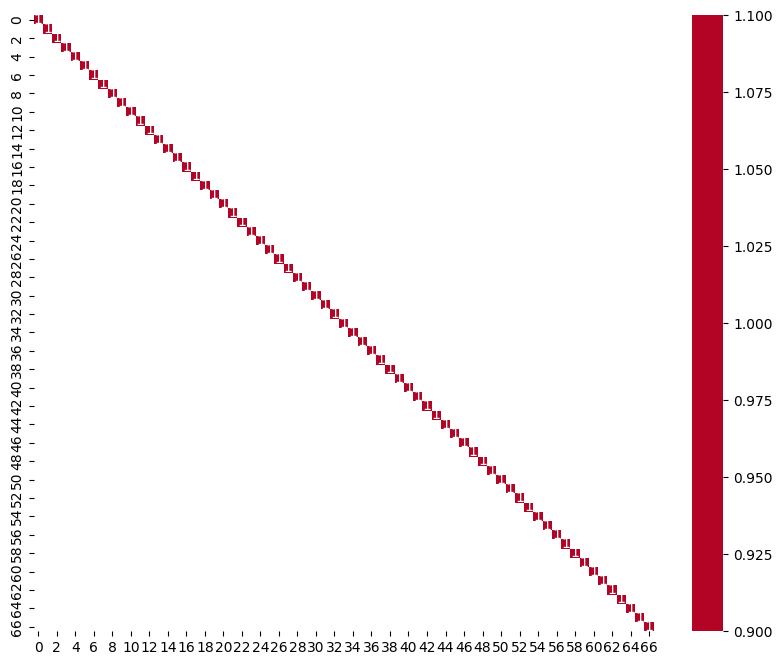

In [ ]:
corr_matrix = x_train_label2_PCA.corr()
corr_threshld = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshld) | (corr_matrix < -corr_threshld)]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr_matrix, annot = True, cmap = 'coolwarm', center = 0 )

In [ ]:
x_test_pca_l2 =pca_label_2_XGB.transform(x_test["label_2"])

In [ ]:
label2_features = pd.DataFrame(data=x_test_pca_l2, columns=[f'new_feature_{i+1}' for i in range(x_test_pca_l2.shape[1])])
label2_features.insert(0,'Predicted labels before feature engineering',y_pred_label_2_test)
label2_features.insert(1,'Predicted labels after feature engineering', y_pred_label_1_PCA_KNN_testing)
label2_features.insert(2,'No of new features', x_test_pca_l2.shape[1])

In [ ]:
write_csv(label2_features, 2)

<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[f'new_feature_{i+1}'] = pd.NA
<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[f'new_feature_{i+1}'] = pd.NA
<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

# Label 3

## KNN

In [ ]:
knn_model_Label3 = KNeighborsClassifier(n_neighbors=5)
knn_model_Label3.fit(x_train["label_3"], y_train["label_3"])

KNeighborsClassifier()

In [ ]:
y_pred_label_3 = knn_model_Label3.predict(x_valid["label_3"])

In [ ]:
accuracy_label_3 = accuracy_score(y_valid["label_3"], y_pred_label_3)
print("Accuracy_label_3:", accuracy_label_3)

Accuracy_label_3: 0.9997545582047686


In [ ]:
# Predict the model on testing data before feature extraction
y_pred_label_3_test = knn_model_Label3.predict(x_test["label_3"])

### PCA

In [ ]:
pca_label_3_KNN = PCA(n_components= 0.67, svd_solver="full")
pca_label_3_KNN.fit(x_train["label_3"])
x_train_label3_PCA = pd.DataFrame(pca_label_3_KNN.transform(x_train["label_3"]))
x_valid_label3_PCA = pd.DataFrame(pca_label_3_KNN.transform(x_valid["label_3"]))
x_test_label3_PCA = pd.DataFrame(pca_label_3_KNN.transform(x_test["label_3"]))
print("Shape after PCA : ", x_train_label3_PCA.shape)

Shape after PCA :  (28520, 19)


In [ ]:
# Train the model on the training data.
knn_model_Label3.fit(x_train_label3_PCA, y_train["label_3"])

KNeighborsClassifier()

In [ ]:
# Predict the labels for the validation data.
y_pred_label_3_PCA_KNN = knn_model_Label3.predict(pca_label_3_KNN.transform(x_valid["label_3"]))

In [ ]:
accuracy_label_3_KNN_PCA = accuracy_score(y_valid["label_3"], y_pred_label_3_PCA_KNN)
print("Accuracy_label_3 after applying PCA for KNN:", accuracy_label_3_KNN_PCA)

Accuracy_label_3 after applying PCA for KNN: 0.9993688639551193


<Axes: >

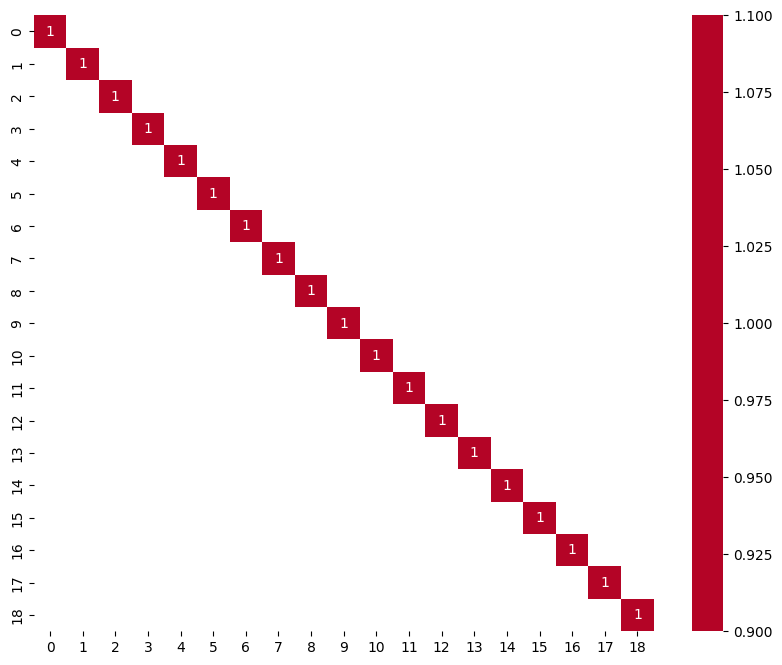

In [ ]:
corr_matrix = x_train_label3_PCA.corr()
corr_threshld = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshld) | (corr_matrix < -corr_threshld)]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr_matrix, annot = True, cmap = 'coolwarm', center = 0 )

In [ ]:
x_test_label3_PCA = pd.DataFrame(pca_label_3_KNN.transform(x_test["label_3"]))
x_test_pca_l3 =pca_label_3_KNN.transform(x_test["label_3"])
# Predict the labels for the testing data.
y_pred_label_3_PCA_KNN_testing = knn_model_Label3.predict(pca_label_3_KNN.transform(x_test["label_3"]))

In [ ]:
label3_features = pd.DataFrame(data=x_test_pca_l3, columns=[f'new_feature_{i+1}' for i in range(x_test_pca_l3.shape[1])])
label3_features.insert(0,'Predicted labels before feature engineering',y_pred_label_3_test)
label3_features.insert(1,'Predicted labels after feature engineering', y_pred_label_3_PCA_KNN_testing)
label3_features.insert(2,'No of new features', x_test_label3_PCA.shape[1])

In [ ]:
write_csv(label3_features, 3)

<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[f'new_feature_{i+1}'] = pd.NA
<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[f'new_feature_{i+1}'] = pd.NA
<ipython-input-16-c733bf14f94b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

## SVM

In [ ]:
# Create a SVM classifier model.
svm_model_label_3 = SVC(kernel="linear", class_weight="balanced")

In [ ]:
# Train the model on the training data.
svm_model_label_3.fit(x_train["label_3"], y_train["label_3"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_3 = svm_model_label_3.predict(x_valid["label_3"])

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_3_SVM = accuracy_score(y_valid["label_3"], y_pred_label_3)
print("Accuracy_label 3:", accuracy_label_3_SVM)

Accuracy_label 3: 0.9998948106591865


### PCA

In [ ]:
svm_model_label_3_PCA = SVC(kernel="linear", class_weight="balanced")

In [ ]:
pca_SVM_Label_3 = PCA(n_components= 0.88, svd_solver="full")
pca_SVM_Label_3.fit(x_train["label_3"])
x_train_label3_PCA_SVM = pd.DataFrame(pca_SVM_Label_3.transform(x_train["label_3"]))
x_valid_label3_PCA_SVM = pd.DataFrame(pca_SVM_Label_3.transform(x_valid["label_3"]))
print("Shape after PCA in Label 3 : ", x_train_label3_PCA_SVM.shape)

Shape after PCA in Label 3 :  (28520, 44)


In [ ]:
# Train the model on the training data.
svm_model_label_3_PCA.fit(x_train_label3_PCA_SVM, y_train["label_3"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_3_PCA_SVM = svm_model_label_3_PCA.predict(x_valid_label3_PCA_SVM)

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_3_SVM_PCA = accuracy_score(y_valid["label_3"], y_pred_label_3_PCA_SVM)
print("Accuracy_label 1 after applying PCA:", accuracy_label_3_SVM_PCA)

Accuracy_label 1 after applying PCA: 0.9960378681626928


# Label 4

## KNN

In [ ]:
knn_model_Label4 = KNeighborsClassifier(n_neighbors=5)
knn_model_Label4.fit(x_train["label_4"], y_train["label_4"])

KNeighborsClassifier()

In [ ]:
y_pred_label_4 = knn_model_Label4.predict(x_valid["label_4"])

In [ ]:
accuracy_label_4 = accuracy_score(y_valid["label_4"], y_pred_label_4)
print("Accuracy_label_4:", accuracy_label_4)

Accuracy_label_4: 0.995617110799439


### PCA

In [ ]:
pca_label_4_KNN = PCA(n_components= 0.90, svd_solver="full")
pca_label_4_KNN.fit(x_train["label_4"])
x_train_label4_PCA = pd.DataFrame(pca_label_4_KNN.transform(x_train["label_4"]))
x_valid_label4_PCA = pd.DataFrame(pca_label_4_KNN.transform(x_valid["label_4"]))
print("Shape after PCA : ", x_train_label4_PCA.shape)

Shape after PCA :  (28520, 49)


In [ ]:
knn_model_Label4.fit(x_train_label4_PCA, y_train["label_4"])

KNeighborsClassifier()

In [ ]:
# Predict the labels for the validation data.
y_pred_label_4_PCA_KNN = knn_model_Label4.predict(pca_label_4_KNN.transform(x_valid["label_4"]))

In [ ]:
accuracy_label_4_KNN_PCA = accuracy_score(y_valid["label_4"], y_pred_label_4_PCA_KNN)
print("Accuracy_label_4 after applying PCA for KNN:", accuracy_label_4_KNN_PCA)

Accuracy_label_4 after applying PCA for KNN: 0.993969144460028


<Axes: >

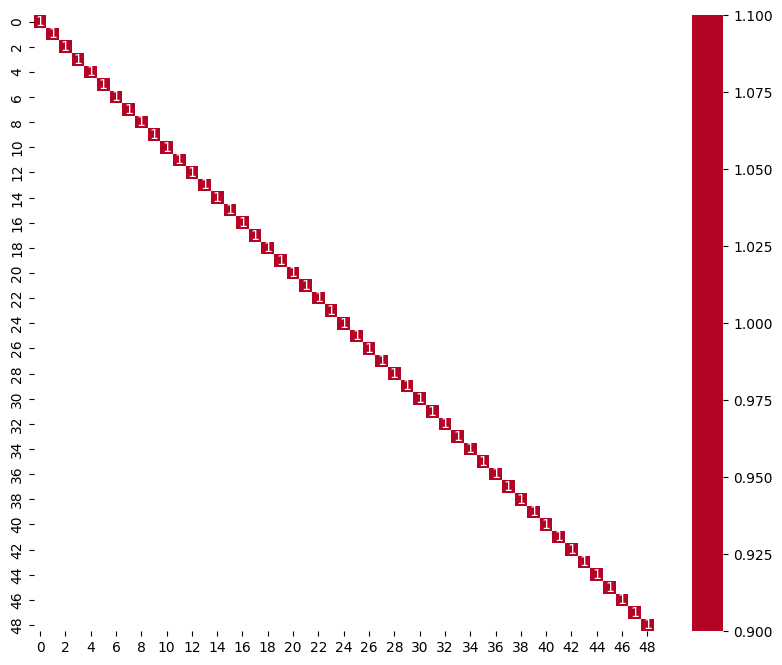

In [ ]:
corr_matrix = x_train_label4_PCA.corr()
corr_threshld = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshld) | (corr_matrix < -corr_threshld)]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr_matrix, annot = True, cmap = 'coolwarm', center = 0 )

## SVM

In [ ]:
# Create a SVM classifier model.
svm_model_label_4 = SVC(kernel="linear", class_weight="balanced")

In [ ]:
# Train the model on the training data.
svm_model_label_4.fit(x_train["label_4"], y_train["label_4"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_4 = svm_model_label_4.predict(x_valid["label_4"])

In [ ]:
accuracy_label_4_SVM = accuracy_score(y_valid["label_4"], y_pred_label_4)
print("Accuracy_label 4:", accuracy_label_4_SVM)

Accuracy_label 4: 0.9519284712482469


In [ ]:
# Predict the model on testing data before feature extraction
y_pred_label_1_test = svm_model_label_4.predict(x_test["label_4"])

### PCA

In [ ]:
svm_model_label_4_PCA = SVC(kernel="linear", class_weight="balanced")

In [ ]:
pca_SVM_Label_4 = PCA(n_components= 0.99, svd_solver="full")
pca_SVM_Label_4.fit(x_train["label_4"])
x_train_label4_PCA_SVM = pd.DataFrame(pca_SVM_Label_4.transform(x_train["label_4"]))
x_valid_label4_PCA_SVM = pd.DataFrame(pca_SVM_Label_4.transform(x_valid["label_4"]))
x_test_label4_PCA_SVM = pd.DataFrame(pca_SVM_Label_4.transform(x_test["label_4"]))
print("Shape after PCA in Label 4 : ", x_train_label4_PCA_SVM.shape)

Shape after PCA in Label 4 :  (28520, 106)


In [ ]:
# Train the model on the training data.
svm_model_label_4_PCA.fit(x_train_label4_PCA_SVM, y_train["label_4"])

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict the labels for the validation data.
y_pred_label_4_PCA_SVM = svm_model_label_4_PCA.predict(x_valid_label4_PCA_SVM)

In [ ]:
# Evaluate the model accuracy on the validation data.
accuracy_label_4_SVM_PCA = accuracy_score(y_valid["label_4"], y_pred_label_4_PCA_SVM)
print("Accuracy_label 4 after applying PCA:", accuracy_label_4_SVM_PCA)

Accuracy_label 4 after applying PCA: 0.8820827489481066


<Axes: >

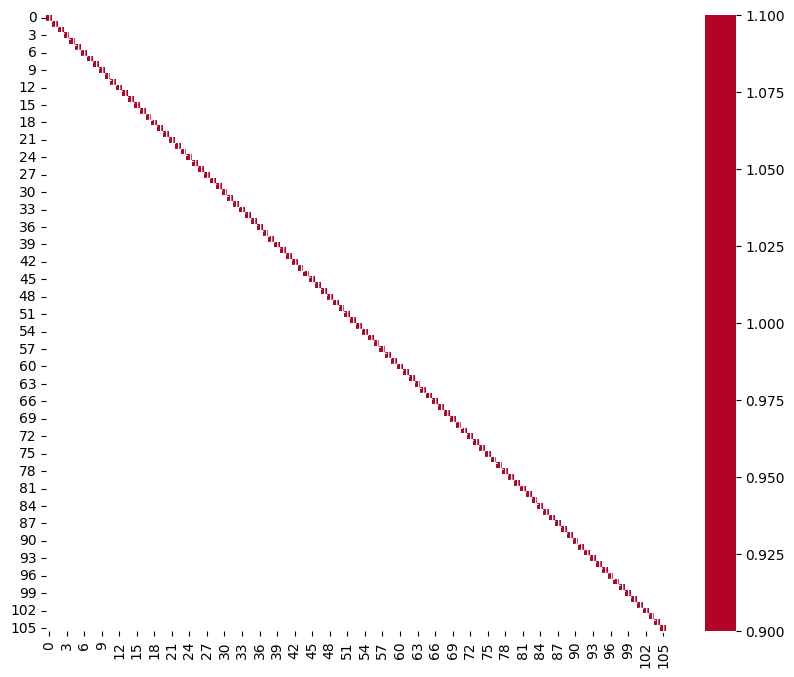

In [ ]:
corr_matrix = x_train_label4_PCA_SVM.corr()
corr_threshld = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshld) | (corr_matrix < -corr_threshld)]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr_matrix, annot = True, cmap = 'coolwarm', center = 0 )

In [ ]:
x_test_label4_PCA = pd.DataFrame(pca_SVM_Label_4.transform(x_test["label_4"]))
x_test_pca_l4 =pca_SVM_Label_4.transform(x_test["label_4"])
# Predict the labels for the testing data.
y_pred_label_4_PCA_SVM_testing = svm_model_label_4_PCA.predict(x_test_label4_PCA_SVM)

In [ ]:
label4_features = pd.DataFrame(data=x_test_pca_l4, columns=[f'new_feature_{i+1}' for i in range(x_test_pca_l4.shape[1])])
label4_features.insert(0,'Predicted labels before feature engineering',y_pred_label_1_test)
label4_features.insert(1,'Predicted labels after feature engineering', y_pred_label_4_PCA_SVM_testing)
label4_features.insert(2,'No of new features', x_test_pca_l4.shape[1])

In [ ]:
write_csv(label4_features, 4)

KeyError: ignored